# Used Car Price Prediction

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [22]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (6, 4)

In [23]:
df = pd.read_csv('dataset/car-data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [24]:
df.drop(columns=['Car_Name'], inplace=True)

In [25]:
print("Shape of dataset:", df.shape)
print("\nColumn types:\n", df.dtypes)
print("\nMissing values:\n", df.isnull().sum())
print("\nDuplicates:", df.duplicated().sum())

Shape of dataset: (301, 8)

Column types:
 Year               int64
Selling_Price    float64
Present_Price    float64
Driven_kms         int64
Fuel_Type         object
Selling_type      object
Transmission      object
Owner              int64
dtype: object

Missing values:
 Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64

Duplicates: 2


In [26]:
df.drop_duplicates(inplace=True)
print("\nDuplicates:", df.duplicated().sum())


Duplicates: 0


In [27]:
df["Fuel_Type"].value_counts()

Fuel_Type
Petrol    239
Diesel     58
CNG         2
Name: count, dtype: int64

In [28]:
df["Selling_type"].value_counts()

Selling_type
Dealer        193
Individual    106
Name: count, dtype: int64

In [29]:
df["Transmission"].value_counts()

Transmission
Manual       260
Automatic     39
Name: count, dtype: int64

In [30]:
from sklearn.preprocessing import LabelEncoder
fuel_le = LabelEncoder()
sell_le = LabelEncoder()
trans_le = LabelEncoder()
df["Fuel_Type"] = fuel_le.fit_transform(df["Fuel_Type"])
df["Selling_type"] = sell_le.fit_transform(df["Selling_type"])
df["Transmission"] = trans_le.fit_transform(df["Transmission"])
df.head()

,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2014,3.35,5.59,27000,2,0,1,0
1,2013,4.75,9.54,43000,1,0,1,0
2,2017,7.25,9.85,6900,2,0,1,0
3,2011,2.85,4.15,5200,2,0,1,0
4,2014,4.60,6.87,42450,1,0,1,0


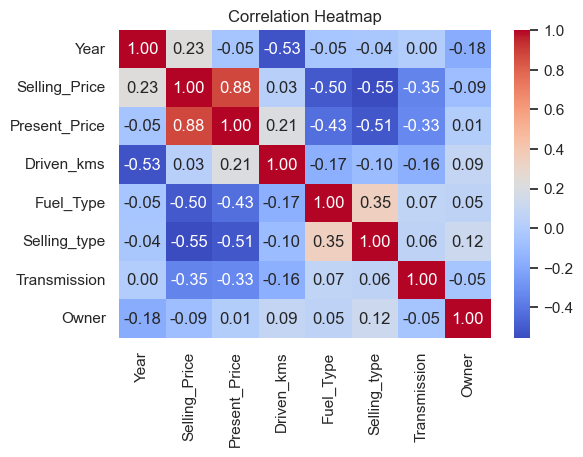

In [31]:
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

## Descriptive Statistics

In [32]:
print("\nSummary Statistics:\n", df.describe(include='all'))


Summary Statistics:
               Year  Selling_Price  Present_Price     Driven_kms   Fuel_Type  \
count   299.000000     299.000000     299.000000     299.000000  299.000000   
mean   2013.615385       4.589632       7.541037   36916.752508    1.792642   
std       2.896868       4.984240       8.566332   39015.170352    0.422297   
min    2003.000000       0.100000       0.320000     500.000000    0.000000   
25%    2012.000000       0.850000       1.200000   15000.000000    2.000000   
50%    2014.000000       3.510000       6.100000   32000.000000    2.000000   
75%    2016.000000       6.000000       9.840000   48883.500000    2.000000   
max    2018.000000      35.000000      92.600000  500000.000000    2.000000   

       Selling_type  Transmission       Owner  
count    299.000000    299.000000  299.000000  
mean       0.354515      0.869565    0.043478  
std        0.479168      0.337346    0.248720  
min        0.000000      0.000000    0.000000  
25%        0.000000      1

## Model Building

In [33]:
from sklearn.model_selection import train_test_split, GridSearchCV

X = df.drop('Selling_Price', axis=1)
y = df['Selling_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.head()

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
6,2015,8.12,18796,2,0,1,0
185,2008,0.58,1900,2,1,0,0
187,2013,0.51,32000,2,1,1,0
148,2010,0.94,45000,2,1,1,0
31,2011,4.89,54200,2,0,1,0


In [34]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import ExtraTreesRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor

model_params = {
    "Linear Regression": {"model": LinearRegression(), "params": {}},
    "Ridge Regression": {"model": Ridge(), "params": {"alpha": [0.1, 1.0, 10.0]}},
    "Lasso Regression": {"model": Lasso(), "params": {"alpha": [0.001, 0.01, 0.1, 1.0]}},
    "ElasticNet": {"model": ElasticNet(), "params": {"alpha": [0.01, 0.1, 1.0], "l1_ratio": [0.2, 0.5, 0.8]}},
    "Decision Tree": {"model": DecisionTreeRegressor(), "params": {"max_depth": [5, 10, 20]}},
    "Random Forest": {"model": RandomForestRegressor(), "params": {"n_estimators": [50, 100], "max_depth": [None, 10, 20]}},
    "Extra Trees": {"model": ExtraTreesRegressor(), "params": {"n_estimators": [100, 200], "max_depth": [10, 20]}},
    "AdaBoost": {"model": AdaBoostRegressor(), "params": {"n_estimators": [50, 100], "learning_rate": [0.05, 0.1, 0.5]}},
    "Gradient Boosting": {"model": GradientBoostingRegressor(), "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}},
    "Support Vector Regressor": {"model": SVR(), "params": {"C": [0.1, 1, 10], "kernel": ["rbf", "linear"]}},
    "KNN Regressor": {"model": KNeighborsRegressor(), "params": {"n_neighbors": [3, 5, 7]}},
    "XGBoost": {"model": XGBRegressor(), "params": {"n_estimators": [100, 200], "learning_rate": [0.05, 0.1]}},
    "CatBoost": {"model": CatBoostRegressor(verbose=0), "params": {"iterations": [100, 200], "learning_rate": [0.05, 0.1]}},
}

In [36]:
from sklearn.metrics import r2_score, mean_squared_error

results = []

for name, mp in model_params.items():
    model = mp["model"]
    param_grid = mp["params"]

    search = GridSearchCV(model, param_grid, cv=3, scoring='r2', n_jobs=-1)
    search.fit(X_train_scaled, y_train)
    best_model = search.best_estimator_
    y_pred = best_model.predict(X_test_scaled)

    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    results.append((name, r2, rmse, search.best_params_))

# Results
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE", "Best Params"])
print("\nFinal Comparison:")
print(results_df.sort_values(by="R2 Score", ascending=False))


Final Comparison:
                       Model  R2 Score      RMSE  \
12                  CatBoost  0.845361  1.996385   
10             KNN Regressor  0.840312  2.028715   
6                Extra Trees  0.823588  2.132303   
11                   XGBoost  0.795384  2.296439   
2           Lasso Regression  0.752760  2.524317   
3                 ElasticNet  0.748582  2.545557   
1           Ridge Regression  0.743183  2.572745   
0          Linear Regression  0.740993  2.583688   
8          Gradient Boosting  0.719516  2.688676   
9   Support Vector Regressor  0.710245  2.732754   
4              Decision Tree  0.646221  3.019611   
7                   AdaBoost  0.627860  3.096978   
5              Random Forest  0.578795  3.294817   

                                     Best Params  
12     {'iterations': 200, 'learning_rate': 0.1}  
10                            {'n_neighbors': 3}  
6         {'max_depth': 20, 'n_estimators': 100}  
11   {'learning_rate': 0.1, 'n_estimators': 200}

In [37]:
model = CatBoostRegressor(iterations=200, learning_rate=0.1, verbose=0)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

In [38]:
import joblib

joblib.dump(fuel_le, 'models/fuel_label_encoder.pkl')
joblib.dump(sell_le, 'models/sell_label_encoder.pkl')
joblib.dump(trans_le, 'models/trans_label_encoder.pkl')
joblib.dump(scaler, 'models/scaler.pkl')
joblib.dump(model, 'models/model.pkl')

['models/model.pkl']

In [39]:
new_data = pd.DataFrame([{
    "Year": 2011,
    "Present_Price": 6.5,
    "Driven_kms": 45000,
    "Fuel_Type": "Petrol",
    "Selling_type": "Dealer",
    "Transmission": "Manual",
    "Owner": 0
}])
new_data

,Year,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,2011,6.5,45000,Petrol,Dealer,Manual,0


In [40]:
new_data['Fuel_Type'] = fuel_le.transform(new_data['Fuel_Type'])
new_data['Selling_type'] = sell_le.transform(new_data['Selling_type'])
new_data['Transmission'] = trans_le.transform(new_data['Transmission'])
new_data_scaled = scaler.transform(new_data)

In [41]:
prediction = model.predict(new_data_scaled)[0]
print("predicted sales price:", prediction)

predicted sales price: 2.9973476520831666


Text(0.5, 1.0, 'Prediction vs Actual (with perfect-fit line)')

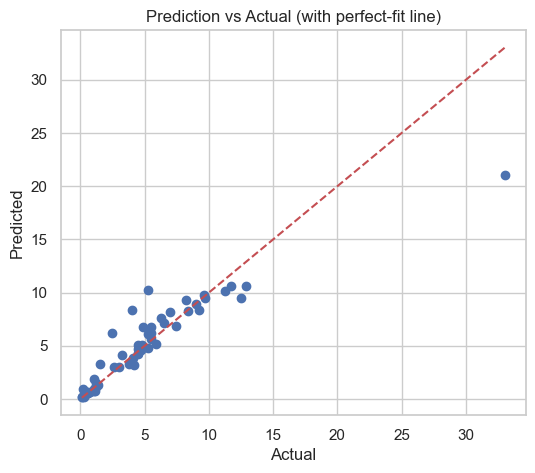

In [42]:
plt.figure(figsize=(6, 5))
plt.scatter(y_test, y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Prediction vs Actual (with perfect-fit line)")